In [1]:
import numpy as np
from dnn_utils import *
import matplotlib.pyplot as plt


In [2]:

### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)



In [3]:

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost =  compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [4]:
#parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)


In [5]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev, 
                                             parameters['W' + str(l)], 
                                             parameters['b' + str(l)], 
                                             activation='relu')
        caches.append(cache)
        
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, 
                                          parameters['W' + str(L)], 
                                          parameters['b' + str(L)], 
                                          activation='sigmoid')
    caches.append(cache)
    
    ### END CODE HERE ###
    
    #print(AL.shape, (2, X.shape[1]) )
    assert(AL.shape == (2, X.shape[1]))
            
    return AL, caches


In [6]:
#layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

In [7]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


In [8]:
#parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [9]:
#pred_train = predict(train_x, train_y, parameters)

In [10]:
#pred_test = predict(test_x, test_y, parameters)

##  Generate Training Data

xe = l1 cos(theta1)  + l2 cos(theta1 + theta2) + l3 cos(theta1 + theta2 + theta3)

ye = l1 sin(theta1) + l2 sin(theta1 + theta2) + l3 sin(theta1 + theta2 + theta3)

In [11]:
def generate_XY_pair(l1,l2,l3, theta1, theta2, theta3):
    """
    Generates a pair of X and Y on provided angles of the robotic arm
    
    Arguments:
    l1 -- length of first arm
    l2 -- length of second arm
    l3 -- length of third arm
    theta1 -- angle from base of first arm
    theta2 -- angle from base of second arm
    theta3 -- angle from base of third arm

    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    xe = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2) + l3 * np.cos(theta1 + theta2 + theta3)
    ye = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2) + l3 * np.sin(theta1 + theta2 + theta3)
    return (xe,ye)

In [12]:

#test the generate_XY_pair
l1 = 1
l2 = 2
l3 = 3

std_dev = 0.1

theta1 = np.pi + np.random.randn() * std_dev
theta2 = np.pi + np.random.randn() * std_dev
theta3 = np.pi + np.random.randn() * std_dev

x,y = generate_XY_pair(l1,l2,l3,theta1,theta2,theta3)
print("angles are", theta1, theta2, theta3)
print("X and Y are", x,y)

angles are 3.114458610918616 3.1038001966267164 3.171781584994252
X and Y are -2.00203599822 0.00156067324082


In [13]:
#lets generate 10000 records

increment = 0.1
no_of_records = 10000

data=[]

theta1=theta2=theta3=-np.pi

for i in range(0, 70):
    #print(i)
    if theta1 < np.pi:
        theta1 +=increment
        theta2=theta3=-np.pi
        for j in range(0, 70):
            if theta2 < np.pi:
                theta2 +=increment
                theta3=-np.pi
                for k in range(0,70):
                    if theta3 < np.pi:
                        theta3 +=increment
                        data.append([theta1,theta2,theta3])

#theta1 = np.pi + np.random.randn(no_of_records) * std_dev
#theta2 = np.pi + np.random.randn(no_of_records) * std_dev
#theta3 = np.pi + np.random.randn(no_of_records) * std_dev



l1 = np.zeros(len(data)) + 1
l2 = np.zeros(len(data)) + 2
l3 = np.zeros(len(data)) + 3

data = np.array(data)

In [14]:
data

array([[-3.04159265, -3.04159265, -3.04159265],
       [-3.04159265, -3.04159265, -2.94159265],
       [-3.04159265, -3.04159265, -2.84159265],
       ..., 
       [ 3.15840735,  3.15840735,  2.95840735],
       [ 3.15840735,  3.15840735,  3.05840735],
       [ 3.15840735,  3.15840735,  3.15840735]])

In [15]:
print(len(data))

x,y = generate_XY_pair(l1,l2,l3,data[:,0],data[:,1],data[:,2])

250047


In [16]:
x[1:10]
y[1:10]

array([-0.87074978, -1.14077137, -1.39642218, -1.63514782, -1.85456303,
       -2.05247548, -2.22690771, -2.37611684, -2.49861201])

In [17]:
#scale the x and y as min-max scaling

x_max = np.max(x)
x_min = np.min(x)

y_max = np.max(y)
y_min = np.min(y)
print(" values are", x_max, y_max, x_min, y_min)

#scale it
x_norm = 2 * ((x - x_min)/ (x_max-x_min)) - 1
y_norm = 2 * ((y - y_min) / (y_max - y_min)) - 1

print(x_norm[1:10])

 values are 5.99793154915 5.9977765609 -5.99754847696 -5.99624414369
[-0.29982052 -0.27807311 -0.2519398  -0.22168168 -0.18760111 -0.15003859
 -0.10936944 -0.06600001 -0.02036364]


In [18]:
np.min(x_norm)

-1.0

In [19]:
#train_x = np.column_stack((theta1,theta2,theta3)).T
train_x = data.T

In [20]:
train_x.shape

(3, 250047)

In [21]:
train_y = np.column_stack((x_norm,y_norm)).T

In [22]:
train_y.shape

(2, 250047)

In [23]:
layers_dims = [3, 10, 20, 10, 2] #  5-layer model

Cost after iteration 0: 1.386295
Cost after iteration 100: 0.991088
Cost after iteration 200: 0.745620
Cost after iteration 300: 0.586019
Cost after iteration 400: 0.476944
Cost after iteration 500: 0.398939
Cost after iteration 600: 0.340940
Cost after iteration 700: 0.296374
Cost after iteration 800: 0.261168
Cost after iteration 900: 0.232694
Cost after iteration 1000: 0.209195
Cost after iteration 1100: 0.189463
Cost after iteration 1200: 0.172643
Cost after iteration 1300: 0.158116
Cost after iteration 1400: 0.145424
Cost after iteration 1500: 0.134224
Cost after iteration 1600: 0.124254
Cost after iteration 1700: 0.115312
Cost after iteration 1800: 0.107239
Cost after iteration 1900: 0.099909
Cost after iteration 2000: 0.093223
Cost after iteration 2100: 0.087098
Cost after iteration 2200: 0.081470
Cost after iteration 2300: 0.076282
Cost after iteration 2400: 0.071488


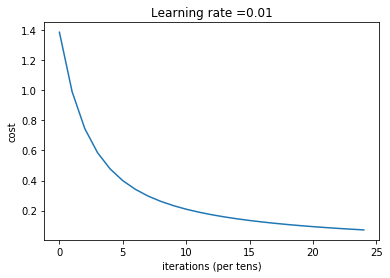

In [39]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True,learning_rate = 0.01)

In [25]:
parameters

{'W1': array([[ 0.0177994 ,  0.00426454,  0.000934  ],
        [-0.01896168, -0.00296312, -0.00359468],
        [-0.00085928, -0.0063077 , -0.00043228],
        [-0.00503953, -0.01329157,  0.00890885],
        [ 0.00875989,  0.01705744,  0.00049753],
        [-0.00412212, -0.0054819 , -0.01547433],
        [ 0.00985497, -0.01099701, -0.01186139],
        [-0.00201888,  0.01492457,  0.00237502],
        [-0.0102983 , -0.00717661,  0.00623851],
        [-0.00162964, -0.00764539, -0.00227443]]),
 'W2': array([[  7.45017086e-03,   1.97225393e-02,  -1.24464765e-02,
          -6.29140961e-03,  -8.03782535e-03,  -2.41942840e-02,
          -9.23798278e-03,  -1.02437895e-02,   1.12073176e-02,
          -1.32487834e-03],
        [ -1.62328981e-02,   6.48107218e-03,  -3.56268503e-03,
          -1.74314196e-02,  -5.96927658e-03,  -5.87463447e-03,
          -8.73862591e-03,   2.98777424e-04,  -2.24811641e-02,
          -2.67732484e-03],
        [  1.01123652e-02,   8.51874484e-03,   1.10803096e-02,

In [26]:
def predict(test_x, parameters):
    return L_model_forward(test_x, parameters)

In [27]:
test_x = np.array([[0.,0.,0.]]).T
print(test_x.shape)
test_y = [6]
predicted_y,cache = predict(test_x, parameters)

(3, 1)


In [28]:
predicted_y

array([[ 0.05033797],
       [ 0.05053092]])

In [29]:
scaled_yx = predicted_y[0] * (x_max-x_min) + x_min
scaled_yy = predicted_y[1] * (y_max-y_min) + y_min
(scaled_yx,scaled_yy)

(array([-5.39372039]), array([-5.3901753]))

In [30]:
param2 = np.copy(parameters)

In [31]:
param2

array({'W1': array([[ 0.0177994 ,  0.00426454,  0.000934  ],
       [-0.01896168, -0.00296312, -0.00359468],
       [-0.00085928, -0.0063077 , -0.00043228],
       [-0.00503953, -0.01329157,  0.00890885],
       [ 0.00875989,  0.01705744,  0.00049753],
       [-0.00412212, -0.0054819 , -0.01547433],
       [ 0.00985497, -0.01099701, -0.01186139],
       [-0.00201888,  0.01492457,  0.00237502],
       [-0.0102983 , -0.00717661,  0.00623851],
       [-0.00162964, -0.00764539, -0.00227443]]), 'b1': array([[ -2.21771776e-05],
       [  1.90935817e-04],
       [  2.75749205e-05],
       [  1.31922903e-04],
       [ -1.76874045e-05],
       [  3.42986346e-05],
       [  1.61916439e-05],
       [  3.96227465e-05],
       [  3.54412123e-05],
       [ -1.97735226e-05]]), 'W2': array([[  7.45017086e-03,   1.97225393e-02,  -1.24464765e-02,
         -6.29140961e-03,  -8.03782535e-03,  -2.41942840e-02,
         -9.23798278e-03,  -1.02437895e-02,   1.12073176e-02,
         -1.32487834e-03],
       [

In [32]:

def L_layer_model_reversed(X, Y, params,layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    params = initialize_parameters_deep_rev(layers_dims,params)
    ### END CODE HERE ###
    #parameters = params
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        #print(i)
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        #print("current params", params)
        X = params["A0"]
        #print("X is",X)
        AL, caches = L_model_forward_inverse(X, params)
        ### END CODE HERE ###
        #print("AL", AL,Y)
        
        # Compute cost.
        
        cost = compute_cost(AL, Y)
        #print("cost", cost)
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
        for key in list(grads):
            if key.startswith("dW") or key.startswith("db"):
                #print("grads are", key)
                grads.pop(key,None)
    
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        params = update_parameters_reversed(params, grads, learning_rate)
        ### END CODE HERE ###
        
        #print("grads", grads)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
  
    
    return params



In [33]:
def update_parameters_reversed(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2  # number of layers in the neural network
    #print("L is ", L, parameters)
    #print("grads is ", L, grads)
    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (˜ 3 lines of code)
    for l in range(L-2):
        #print(l,parameters["A" + str(l )].shape,grads["dA" + str(l + 1)])
        #print("dA" + str(l + 1) , " applied")
        parameters["A" + str(l )] = parameters["A" + str(l )] - learning_rate * grads["dA" + str(l + 1)]
       # parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    ### END CODE HERE ###
    #print("L is ", L, grads)
    #parameters["A" + str(L-2)] = parameters["A" + str(L-2 )] - learning_rate * grads["dA" + str(L-2)]
    
    return parameters


In [34]:
def initialize_parameters_deep_rev(layer_dims,parameters):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)
    #parameters = {}
    L = len(layer_dims)  # number of layers in the network

    for l in range(0, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        #parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['A' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###

        #assert (parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        #assert (parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    
    return parameters

In [35]:
def L_model_forward_inverse(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, 4):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        #print("l is", l)
        A, cache = linear_activation_forward(A_prev, 
                                             parameters['W' + str(l)], 
                                             parameters['b' + str(l)], 
                                             activation='relu')
        caches.append(cache)
        
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    L=4
    AL, cache = linear_activation_forward(A, 
                                          parameters['W' + str(L)], 
                                          parameters['b' + str(L)], 
                                          activation='sigmoid')
    caches.append(cache)
    
    ### END CODE HERE ###
    
    #print(AL.shape, (2, X.shape[1]) )
    assert(AL.shape == (2, X.shape[1]))
            
    return AL, caches



Cost after iteration 0: 17.703407
Cost after iteration 100: 15.339295
Cost after iteration 200: 14.094039
Cost after iteration 300: 12.813511
Cost after iteration 400: 11.543576
Cost after iteration 500: 10.326279
Cost after iteration 600: 9.082035
Cost after iteration 700: 7.853533
Cost after iteration 800: 6.681087
Cost after iteration 900: 5.488531
Cost after iteration 1000: 4.343069
Cost after iteration 1100: 3.202485
Cost after iteration 1200: 2.073822
Cost after iteration 1300: 1.002532


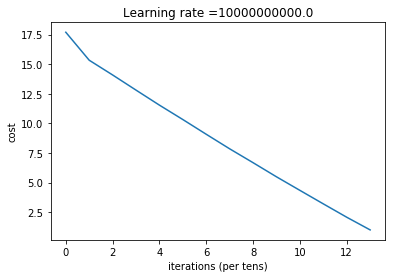

In [36]:
X1 = np.array([[0.,0.,0.]]).T
Y1 = np.array([[0.,6.]]).T
P=L_layer_model_reversed(X1,Y1,parameters,layers_dims,learning_rate = 10e9,print_cost=True,num_iterations = 1350)

In [37]:
adj_inputs = P["A0"]

In [38]:
adj_inputs

array([[ 10345061.79140309],
       [ 10904019.55644543],
       [   104932.2233483 ]])